In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense

### keras documentation: https://keras.io

## Loading Diabetes Dataset

In [41]:
# Loda the dataset for
data = pd.read_csv('diabetes.csv')

In [42]:
# Viewing data
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Goal: to predict based on diagnostic measurements whether a patient has diabetes

<Axes: xlabel='Outcome'>

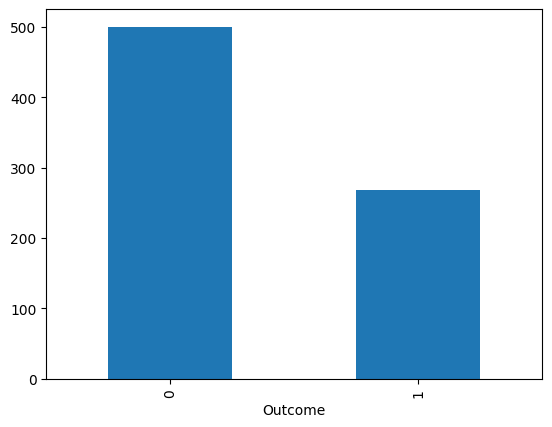

In [43]:
import seaborn as sns
data['Outcome'].value_counts().plot(kind = 'bar')

### Preparing Data for modeling

In [44]:
# split into input (X) and output (y) variables
predictors = data.iloc[:,0:8]
response = data.iloc[:,8]

In [45]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(predictors, response, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(614, 8) (614,)
(154, 8) (154,)


### Training Neural Network model

- **There are Two ways to build Keras model:**
    - **Sequential**
        - **Sequential API allows you to create models layer-by-layer**
    - **Functional**


In [46]:
# define the keras model - layer by layer
kerasmodel = Sequential() # initializing model - Dense for fully connected layer
kerasmodel.add(Dense(12, input_dim=8, activation='relu')) # First Hidden layer
kerasmodel.add(Dense(8, activation='relu')) # Relu to avoid vanishing/exploding gradient problem - #
kerasmodel.add(Dense(1, activation='sigmoid')) # since output is binary so "sigmoid" - # Outputlayer

# Weight and bias initialization are done by keras default methods using "'glorot_uniform'"

In [47]:
# compiling model
kerasmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [48]:
# fitting model
kerasmodel.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
62/62 [==============================] - 0s 464us/step - loss: 6.7235 - accuracy: 0.6580
Epoch 2/150
62/62 [==============================] - 0s 454us/step - loss: 1.5601 - accuracy: 0.6629
Epoch 3/150
62/62 [==============================] - 0s 552us/step - loss: 0.9368 - accuracy: 0.6466
Epoch 4/150
62/62 [==============================] - 0s 394us/step - loss: 0.7675 - accuracy: 0.6547
Epoch 5/150
62/62 [==============================] - 0s 399us/step - loss: 0.7243 - accuracy: 0.6580
Epoch 6/150
62/62 [==============================] - 0s 428us/step - loss: 0.7031 - accuracy: 0.6580
Epoch 7/150
62/62 [==============================] - 0s 408us/step - loss: 0.6670 - accuracy: 0.6694
Epoch 8/150
62/62 [==============================] - 0s 410us/step - loss: 0.6841 - accuracy: 0.6678
Epoch 9/150
62/62 [==============================] - 0s 419us/step - loss: 0.6781 - accuracy: 0.6498
Epoch 10/150
62/62 [==============================] - 0s 429us/step - loss: 0.6457 - accura

62/62 [==============================] - 0s 409us/step - loss: 0.5017 - accuracy: 0.7508
Epoch 82/150
62/62 [==============================] - 0s 416us/step - loss: 0.5187 - accuracy: 0.7362
Epoch 83/150
62/62 [==============================] - 0s 419us/step - loss: 0.5013 - accuracy: 0.7394
Epoch 84/150
62/62 [==============================] - 0s 408us/step - loss: 0.5067 - accuracy: 0.7557
Epoch 85/150
62/62 [==============================] - 0s 404us/step - loss: 0.5020 - accuracy: 0.7573
Epoch 86/150
62/62 [==============================] - 0s 445us/step - loss: 0.5036 - accuracy: 0.7573
Epoch 87/150
62/62 [==============================] - 0s 421us/step - loss: 0.5012 - accuracy: 0.7557
Epoch 88/150
62/62 [==============================] - 0s 431us/step - loss: 0.5113 - accuracy: 0.7459
Epoch 89/150
62/62 [==============================] - 0s 406us/step - loss: 0.5004 - accuracy: 0.7508
Epoch 90/150
62/62 [==============================] - 0s 442us/step - loss: 0.5010 - accuracy: 

In [49]:
# Train accuracy
_, accuracy = kerasmodel.evaluate(X_train, y_train)
print('Train Accuracy: %.2f' %(accuracy*100))

20/20 [==============================] - 0s 493us/step - loss: 0.4933 - accuracy: 0.7622
Train Accuracy: 76.22


In [50]:
# test accuracy
from sklearn.metrics import accuracy_score
y_pred = kerasmodel.predict_classes(X_test)

accuracy_score(y_test, y_pred)

/home/atamuratove/.local/lib/python3.10/site-packages/tensorflow/python/keras/engine/sequential.py:454: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.7467532467532467